In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [4]:
df=pd.read_csv("supermarket_sales - Sheet1.csv")
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

In [7]:
df.duplicated().value_counts()

False    1000
dtype: int64

In [8]:
df_categorical=df.select_dtypes('object')
#df_categorical.info()
print(df_categorical.Branch.value_counts())
print(df_categorical.City.value_counts())
print(df_categorical.Gender.value_counts())
print(df_categorical.Payment.value_counts())
print(df_categorical['Customer type'].value_counts())
print(df_categorical['Product line'].value_counts())

A    340
B    332
C    328
Name: Branch, dtype: int64
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
Female    501
Male      499
Name: Gender, dtype: int64
Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64
Member    501
Normal    499
Name: Customer type, dtype: int64
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

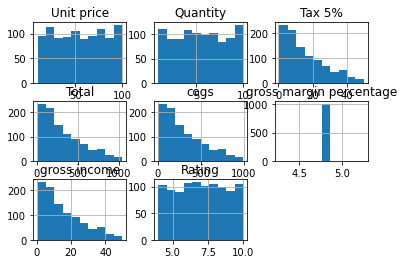

In [9]:
df_numeruc=df.select_dtypes(['float64', 'int64'])
df_numeruc.hist()

In [10]:
df['gross margin percentage'].value_counts()


4.761905    1000
Name: gross margin percentage, dtype: int64

In [11]:
df.drop('gross margin percentage', axis=1, inplace=True)

In [12]:
#df.columns()
df.info()
# Questions to ask: What predicts what- total, gross income, coge, gross income-coges?
# payment, product, quanttity line by customer type , gender, customer types 
# times, seasonal
# t test?
# what products more expensive?
# when and where spand more?
# The above 75 percentile- high income. what we know about this days, clients?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  cogs           1000 non-null   float64
 14  gross income   1000 non-null   float64
 15  Rating         1000 non-null   float64
dtypes: float64(6), int64(1), object(9)
memory usage: 125.1+ KB


In [13]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


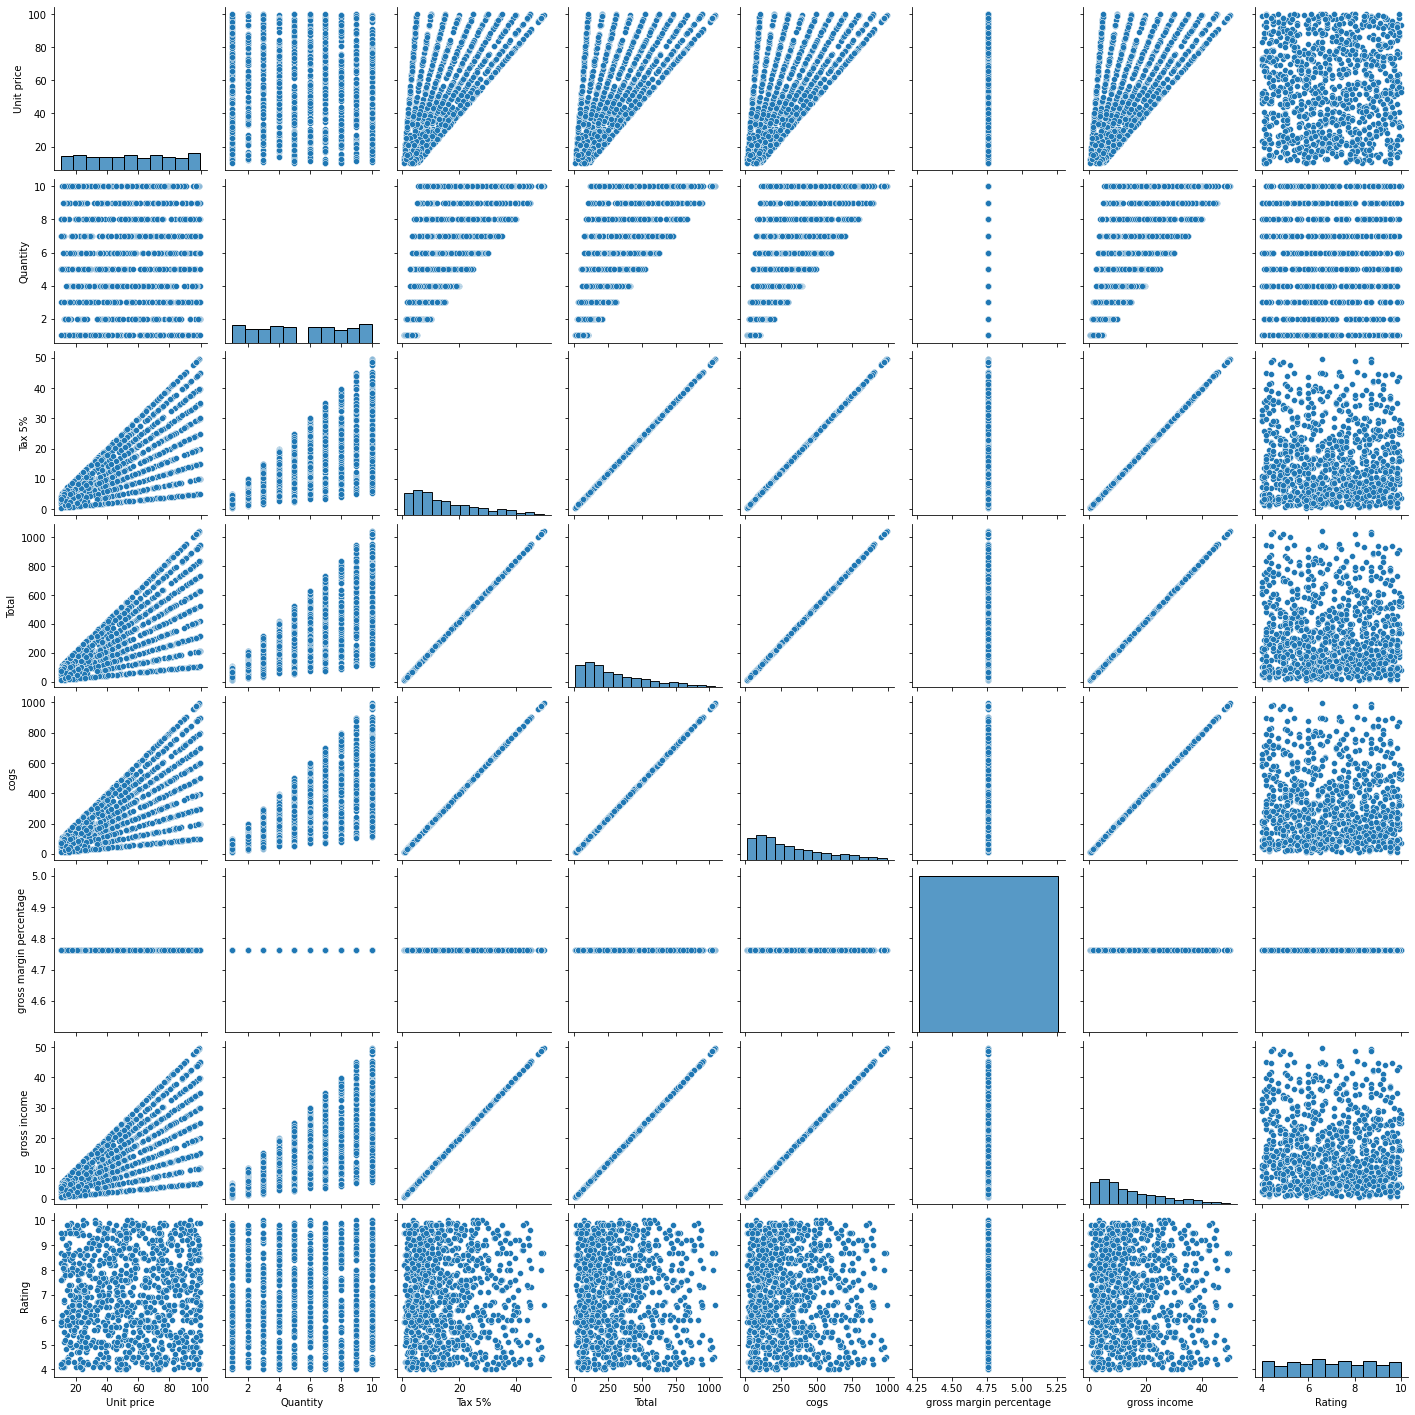

In [14]:
columns_to_plot=df_numeruc
sns.pairplot(columns_to_plot)


In [15]:
#print(df['Date'].sort_values())
print(np.max(df['Date']))
df_time= df.groupby(sorted(df['Date']))['gross income'].mean()
print(df_time)

3/9/2019
1/1/2019     17.236833
1/10/2019    19.643056
1/11/2019    11.502562
1/12/2019    19.399227
1/13/2019    17.200100
               ...    
3/5/2019     15.506382
3/6/2019     13.608182
3/7/2019     14.555611
3/8/2019     14.144545
3/9/2019     18.987250
Name: gross income, Length: 89, dtype: float64


In [16]:
df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df['month'].value_counts()
by_month= df.groupby(sorted(df['month']))['gross income'].mean()
median_by_month= df.groupby(sorted(df['month']))['gross income'].median()
print(by_month)
print(median_by_month)

1    16.334237
2    14.419875
3    15.247813
Name: gross income, dtype: float64
1    13.26125
2    11.10600
3    12.01200
Name: gross income, dtype: float64


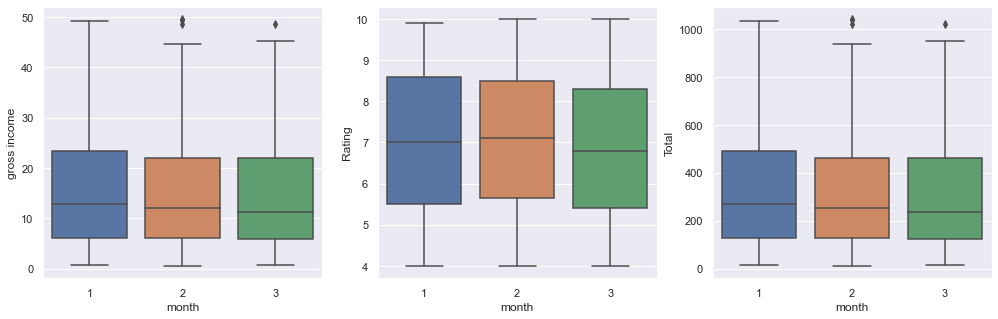

In [17]:
#to_plot=account_add[['flw_a', 'flg_a','likes_a', 'hash_a', 'cap_avg_a','comment_r_a', 'post_interval_a']]

sns.set(rc={'figure.figsize':(17,5)})
fig, ax = plt.subplots(1,3)
sns.boxplot(x='month', y='gross income',data=df, ax=ax[0])
sns.boxplot(x='month', y='Rating',data=df, ax=ax[1])
sns.boxplot(x='month', y='Total',data=df, ax=ax[2])
plt.show()

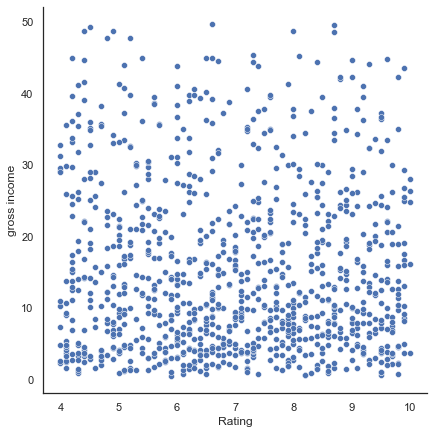

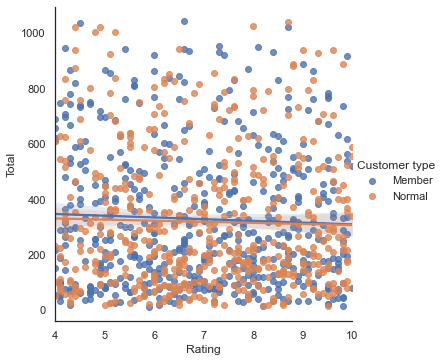

In [18]:

sns.set_theme(style="white")
# Plot 
sns.relplot(x="Rating", y="gross income",
            sizes=(40, 400),
            height=6, data=df)
sns.lmplot(x="Rating", y="Total", hue= 'Customer type', data=df)

In [19]:
# Create bins of high total .
high=df['Unit price'].quantile(0.75)
print(high)
h_bool=df['Unit price']>high
high_price=df[df['Unit price']>high]
#print(high_price)

77.935


In [20]:
low=df['Unit price'].quantile(0.25)
low
notlow_price=df[low<df['Unit price']]
notlow_price
#print(high_price)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,26.1415,9.1,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,30.2085,5.3,2
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,29.8865,4.1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40,Ewallet,60.95,3.0475,5.9,2
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,2.0175,6.2,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,48.6900,4.4,3
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,3.2910,4.1,2


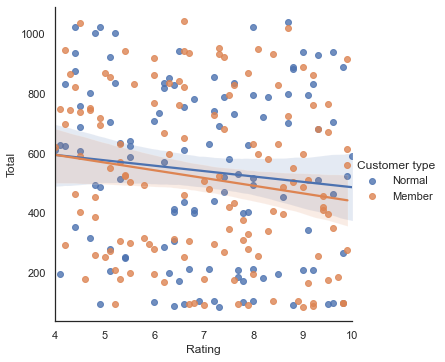

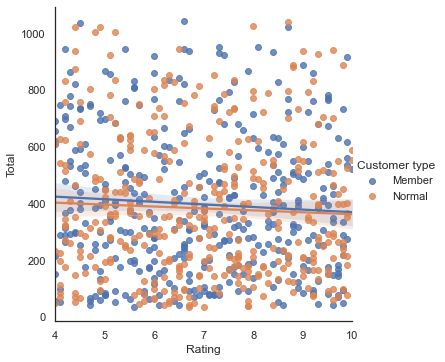

In [21]:
sns.lmplot(x="Rating", y="Total", hue= 'Customer type', data=high_price)
sns.lmplot(x="Rating", y="Total", hue= 'Customer type', data=notlow_price)

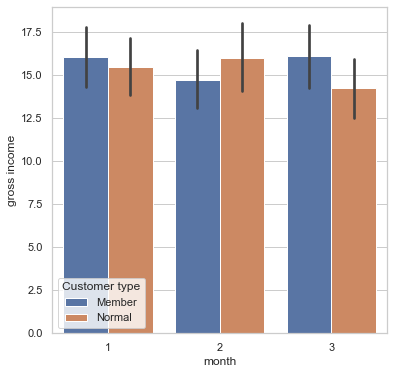

In [34]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.barplot(x="month", y="gross income", hue="Customer type", data=df)

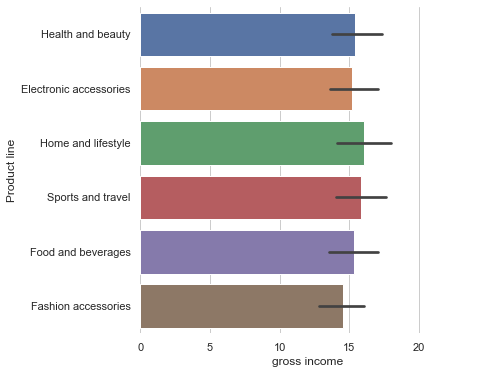

In [23]:
# Initialize the matplotlib figure
df_toplot = df.sort_values("gross income")
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6))

# Plot:
sns.set_color_codes("pastel")
sns.barplot(x="gross income", y="Product line", data=df, orient = 'h',
            label="income from different product lines")

# legend and informative axis label
ax.set(xlim=(0, 24), ylabel="Product line",
       xlabel="gross income")
sns.despine(left=True, bottom=True)

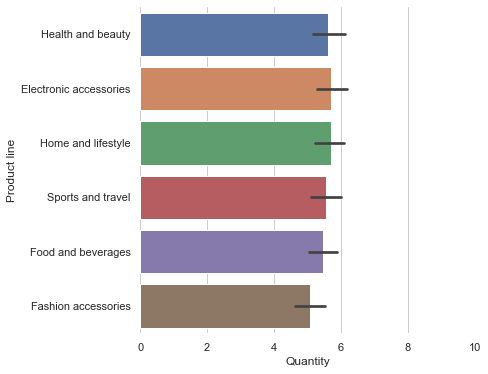

In [24]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6))

# Plot:
sns.set_color_codes("pastel")
sns.barplot(x="Quantity", y="Product line", data=df, orient = 'h',
            label="income from different product lines")

# legend and informative axis label
ax.set(xlim=(0, 10), ylabel="Product line",
       xlabel="Quantity")
sns.despine(left=True, bottom=True)

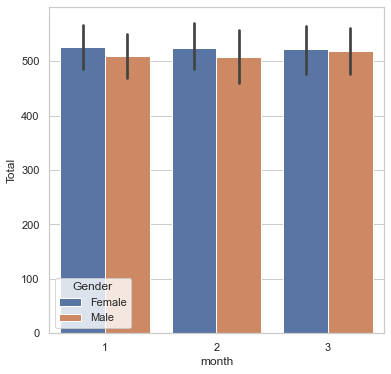

In [25]:
# Create groups of customers.
median=df.Total.median()
high_paying=df[df.Total>median]
#print(high_paying.head())
Low_paying=df[df.Total<median]
#print(Low_paying.head())
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.barplot(x="month", y="Total", hue="Gender", data=high_paying)

In [26]:
import time
import datetime
df['time'] = df.Time
#timestamp = time.mktime(datetime.timetuple())
#for 
#timestamp = datetime.datetime.timestamp(df['time'])
#print(timestamp)

df['time'] = df['Time'].apply(lambda x: pd.Timestamp(x).hour)
df.time.value_counts()

19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: time, dtype: int64

In [27]:
df.loc[df['time']<12, 'time_of_day'] = 'Morning'
df.loc[df['time']>17, 'time_of_day'] = 'Evening'
df.loc[(df['time'] >12) & (df['time'] < 17), 'time_of_day'] = 'Afternoon'
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating,month,time,time_of_day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,26.1415,9.1,1,13,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,3.8200,9.6,3,10,Morning
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,16.2155,7.4,3,13,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,23.2880,8.4,1,20,Evening
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,30.2085,5.3,2,10,Morning


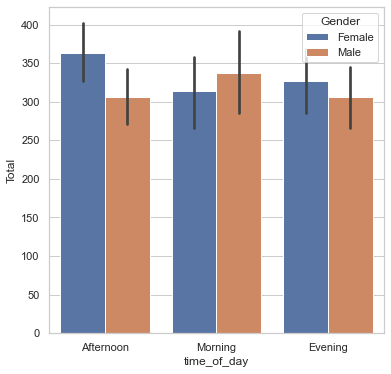

In [35]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.barplot(x='time_of_day', y="Total", hue="Gender", data=df)

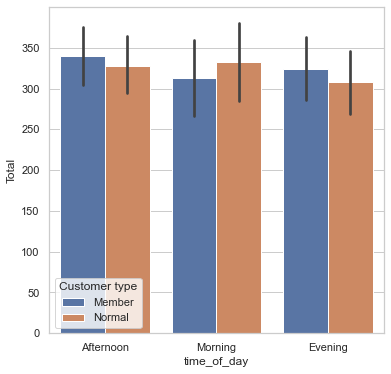

In [36]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.barplot(x='time_of_day', y="Total", hue="Customer type", data=df)

In [31]:
#df['month'].hist()

In [32]:
df_hist=df.dropna()

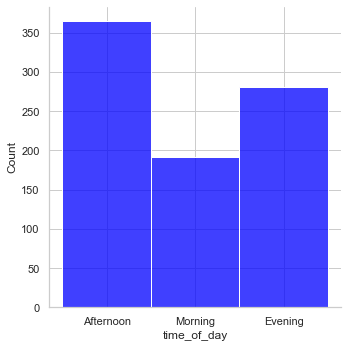

In [33]:
df.dropna()
df.time_of_day.value_counts()
ax=sns.displot(df_hist['time_of_day'], color="blue")

In [30]:
#df['both_data']=df[[df['Customer type']=='Member']["Total"], df[df['Customer type']=='Normal']["Total"]].sum()
#print(df.head())